<a href="https://colab.research.google.com/github/plaban1981/Timeseries/blob/master/Grocery_Sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving Test.csv to Test.csv


{'Test.csv': b'Day\n693\n694\n695\n696\n697\n698\n699\n700\n701\n702\n703\n704\n705\n706\n707\n708\n709\n710\n711\n712\n713\n714\n715\n716\n717\n718\n719\n720\n721\n722\n723\n724\n725\n726\n727\n728\n729\n730\n731\n732\n733\n734\n735\n736\n737\n738\n739\n740\n741\n742\n743\n744\n745\n746\n747\n748\n749\n750\n751\n752\n753\n754\n755\n756\n757\n758\n759\n760\n761\n762\n763\n764\n765\n766\n767\n768\n769\n770\n771\n772\n773\n774\n775\n776\n777\n778\n779\n780\n781\n782\n'}

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fbprophet
import pandas.util.testing as tm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [6]:
train.shape,test.shape

((692, 2), (90, 1))

In [111]:
test.head()

,Day
0,693
1,694
2,695
3,696
4,697


In [0]:
train_date = pd.date_range(start='2018-01-01',end='2020-05-01',periods=692)

In [6]:
train_date.shape

(692,)

In [0]:
train['TS'] = train_date

In [0]:
test_date =  pd.date_range(start='2020-05-02',periods=90)

In [0]:
test['Date'] = test_date

In [10]:
test_date.shape

(90,)

In [0]:
train['Date'] = train['TS'].dt.date

In [0]:
test['Date'] = test['TS'].dt.date

In [12]:
train.head()

,Day,GrocerySales,TS,Date
0,1,8418.59,2018-01-01 00:00:00.000000000,2018-01-01
1,2,8447.47,2018-01-02 05:33:25.788712011,2018-01-02
2,3,8336.49,2018-01-03 11:06:51.577424023,2018-01-03
3,4,8579.17,2018-01-04 16:40:17.366136034,2018-01-04
4,5,8524.31,2018-01-05 22:13:43.154848046,2018-01-05


In [117]:
test.head()

,Day,Date
0,693,2020-05-02
1,694,2020-05-03
2,695,2020-05-04
3,696,2020-05-05
4,697,2020-05-06


In [70]:
test.shape

(90, 2)

In [0]:
df_test = test[['Date']]

In [0]:
df_train = train[['Date','GrocerySales']]

In [0]:
df = df_train.copy()

In [15]:
df.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [0]:
train_date = pd.date_range(start='2018-01-01',periods=692)
train['Date'] = train_date
test_date =  pd.date_range(start='2019-11-24',periods=90)
test['Date'] = test_date

In [0]:
df = train[['Date','GrocerySales']].copy()

In [0]:
df = df.rename(columns={'Date':'ds','GrocerySales':'y'})

In [0]:
m = fbprophet.Prophet()

In [125]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future_dates = m.make_future_dataframe(periods=90)

In [118]:
future_dates.shape

(782, 1)

In [76]:
future_dates.tail()

,ds
777,2020-02-17
778,2020-02-18
779,2020-02-19
780,2020-02-20
781,2020-02-21


In [127]:
forecast = m.predict(future_dates)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,8439.909258,7992.547466,8890.586493,8439.909258,8439.909258,15.018604,15.018604,15.018604,15.018604,15.018604,15.018604,0.0,0.0,0.0,8454.927862
1,2018-01-02,8438.008294,7974.624899,8865.911333,8438.008294,8438.008294,-3.688409,-3.688409,-3.688409,-3.688409,-3.688409,-3.688409,0.0,0.0,0.0,8434.319885
2,2018-01-03,8436.107330,7943.601682,8803.344643,8436.107330,8436.107330,-28.458859,-28.458859,-28.458859,-28.458859,-28.458859,-28.458859,0.0,0.0,0.0,8407.648471
3,2018-01-04,8434.206366,8031.747882,8926.737447,8434.206366,8434.206366,11.495437,11.495437,11.495437,11.495437,11.495437,11.495437,0.0,0.0,0.0,8445.701803
4,2018-01-05,8432.305402,7969.411544,8945.213317,8432.305402,8432.305402,6.521368,6.521368,6.521368,6.521368,6.521368,6.521368,0.0,0.0,0.0,8438.826770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2020-02-17,8997.623789,8528.902603,9435.467671,8951.677833,9047.116955,15.018604,15.018604,15.018604,15.018604,15.018604,15.018604,0.0,0.0,0.0,9012.642393
778,2020-02-18,8998.550729,8522.033906,9477.711665,8951.888812,9049.387428,-3.688409,-3.688409,-3.688409,-3.688409,-3.688409,-3.688409,0.0,0.0,0.0,8994.862320
779,2020-02-19,8999.477669,8487.100907,9426.778674,8952.121409,9050.849738,-28.458859,-28.458859,-28.458859,-28.458859,-28.458859,-28.458859,0.0,0.0,0.0,8971.018811
780,2020-02-20,9000.404609,8525.785384,9472.118916,8952.177745,9052.296800,11.495437,11.495437,11.495437,11.495437,11.495437,11.495437,0.0,0.0,0.0,9011.900046


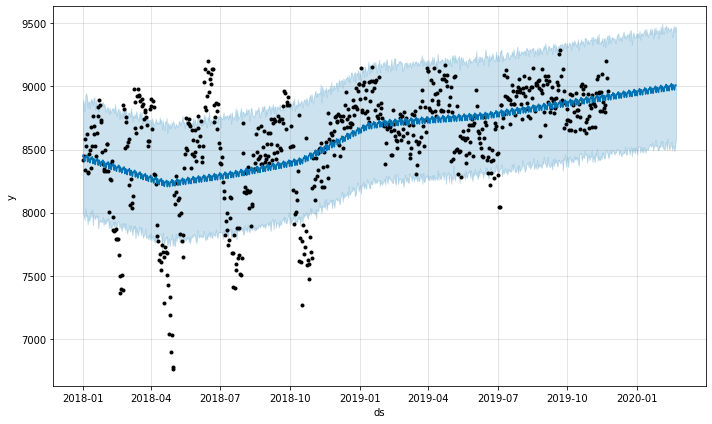

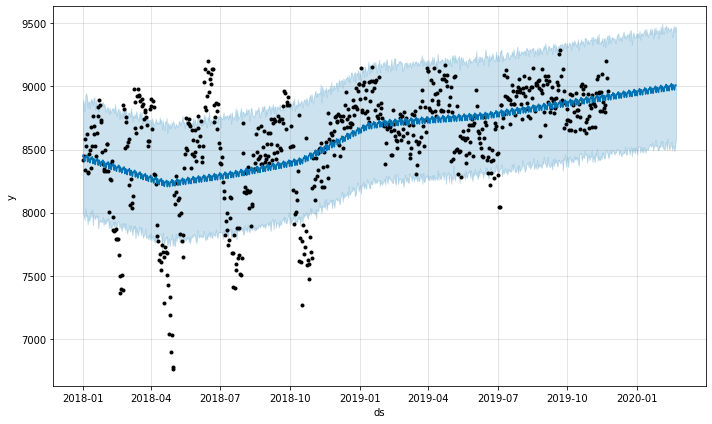

In [130]:
# Plot Our Predictions
m.plot(forecast)

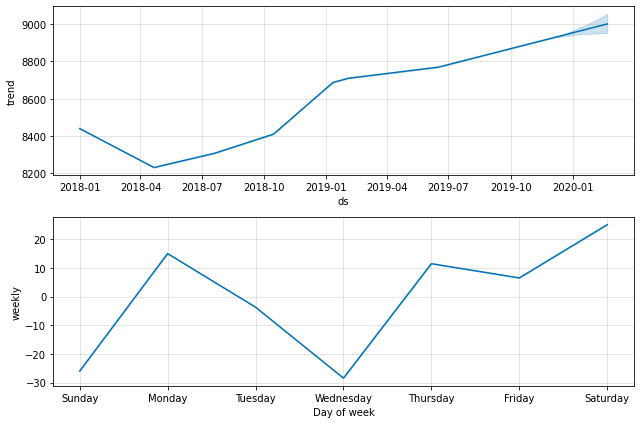

In [132]:
# Visualize Each Component [Trends,Weekly]
m.plot_components(forecast)
plt.show()

In [138]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(m,initial='1 days', period='90 days', horizon = '34 days')
cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2018-01-28 00:00:00 and 2019-10-20 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-01-29,8423.583308,8281.417534,8569.887414,8333.17,2018-01-28
1,2018-01-30,8392.555156,8238.790965,8536.557893,8497.34,2018-01-28
2,2018-01-31,8271.565183,8137.434954,8420.748984,8326.74,2018-01-28
3,2018-02-01,8304.617301,8147.744431,8451.684845,8542.81,2018-01-28
4,2018-02-02,8147.405480,7997.989095,8297.115717,8544.43,2018-01-28


In [139]:
from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(cv)

df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,2.452664e+05,495.243775,339.462354,0.041323,0.026066,0.763889
1,5 days,3.304308e+05,574.831091,403.882055,0.048567,0.026066,0.666667
2,6 days,3.431555e+05,585.794763,416.353696,0.049975,0.028271,0.638889
3,7 days,3.352080e+05,578.971466,395.991902,0.047340,0.024317,0.722222
4,8 days,3.487002e+05,590.508454,404.442152,0.048380,0.028271,0.699074
5,9 days,3.751246e+05,612.474171,429.493912,0.051478,0.033107,0.675926
6,10 days,4.056901e+05,636.938064,464.995241,0.055919,0.039733,0.615741
7,11 days,3.981085e+05,630.958375,461.428308,0.055873,0.039649,0.611111
8,12 days,4.095290e+05,639.944512,465.159851,0.056502,0.039733,0.662037
9,13 days,3.797835e+05,616.265779,436.111125,0.053176,0.027796,0.699074


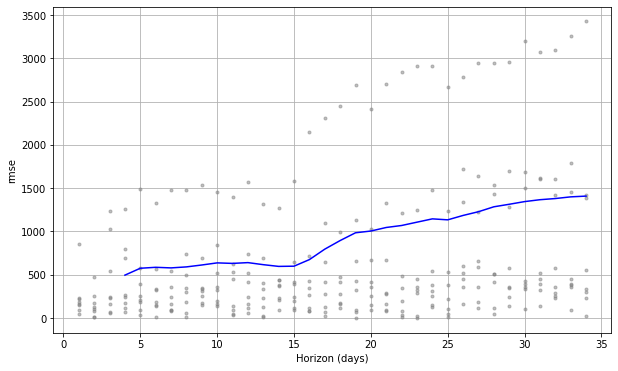

In [140]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv,metric='rmse')
plt.show()

In [0]:
f = forecast[['ds','yhat']]

In [0]:
a = df.copy()

In [0]:
a['ds'] = pd.to_datetime(a['ds'])

In [82]:
pred = pd.merge(a,f,how='inner',on='ds')
pred.head()

,ds,y,yhat
0,2018-01-01,8418.59,8454.927862
1,2018-01-02,8447.47,8434.319885
2,2018-01-03,8336.49,8407.648471
3,2018-01-04,8579.17,8445.701803
4,2018-01-05,8524.31,8438.826770


# Evaluation of Predictions

In [83]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred['y'],pred['yhat']))

355.4365508446735

In [84]:
df.tail()

,ds,y
687,2019-11-19,8848.98
688,2019-11-20,8800.45
689,2019-11-21,9197.99
690,2019-11-22,9062.44
691,2019-11-23,8963.12


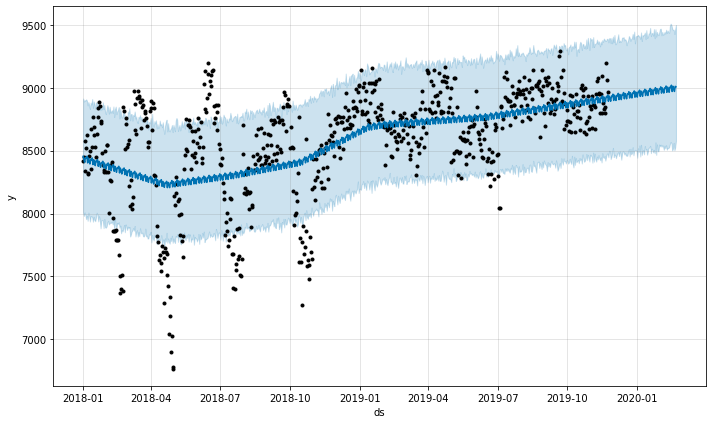

In [85]:
m.plot(forecast)
plt.show()


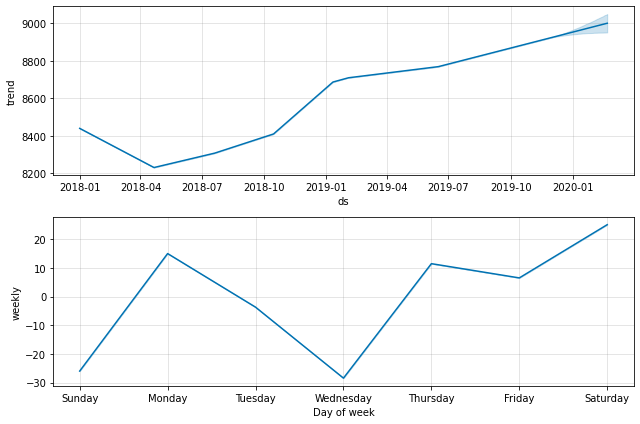

In [86]:
m.plot_components(forecast)
plt.show()


In [0]:
sub = forecast.loc[692:]

In [0]:
sub = sub.rename(columns={'yhat':'GrocerySales'})

In [103]:
sub.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,GrocerySales
692,2020-05-02,8766.191408,8300.629910,9013.853927,8766.191408,8766.191408,-116.922270,-116.922270,-116.922270,6.245334,6.245334,6.245334,-123.167604,-123.167604,-123.167604,0.0,0.0,0.0,8649.269137
693,2020-05-03,8766.125514,8226.667438,8955.584100,8766.125514,8766.125514,-179.587642,-179.587642,-179.587642,-12.080925,-12.080925,-12.080925,-167.506717,-167.506717,-167.506717,0.0,0.0,0.0,8586.537872
694,2020-05-04,8766.059621,8191.504052,8888.698961,8766.059621,8766.059621,-227.573697,-227.573697,-227.573697,-15.668073,-15.668073,-15.668073,-211.905624,-211.905624,-211.905624,0.0,0.0,0.0,8538.485924
695,2020-05-05,8765.993728,8140.889465,8869.662226,8765.993728,8765.993728,-257.102720,-257.102720,-257.102720,-1.252368,-1.252368,-1.252368,-255.850353,-255.850353,-255.850353,0.0,0.0,0.0,8508.891007
696,2020-05-06,8765.927834,8138.209624,8811.041934,8765.927834,8765.927834,-281.434290,-281.434290,-281.434290,17.387811,17.387811,17.387811,-298.822101,-298.822101,-298.822101,0.0,0.0,0.0,8484.493544


In [0]:
sub.loc[692:]['GrocerySales'].to_excel('sub.xlsx',index=False)

In [107]:
test.head()

,Day,TS,Date
0,693,2020-05-05,2020-05-05
1,694,2020-05-06,2020-05-06
2,695,2020-05-07,2020-05-07
3,696,2020-05-08,2020-05-08
4,697,2020-05-09,2020-05-09


In [109]:
sub.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,GrocerySales
777,2020-07-26,8760.590473,8806.543341,9566.137856,8722.002534,8797.270380,416.259241,416.259241,416.259241,-12.080925,-12.080925,-12.080925,428.340167,428.340167,428.340167,0.0,0.0,0.0,9176.849714
778,2020-07-27,8760.524579,8809.291859,9509.310263,8721.192133,8797.729634,413.815741,413.815741,413.815741,-15.668073,-15.668073,-15.668073,429.483813,429.483813,429.483813,0.0,0.0,0.0,9174.340320
779,2020-07-28,8760.458686,8843.395549,9536.779369,8720.617445,8798.370334,427.333311,427.333311,427.333311,-1.252368,-1.252368,-1.252368,428.585679,428.585679,428.585679,0.0,0.0,0.0,9187.791997
780,2020-07-29,8760.392792,8834.287182,9591.090160,8719.959034,8799.199782,442.934193,442.934193,442.934193,17.387811,17.387811,17.387811,425.546382,425.546382,425.546382,0.0,0.0,0.0,9203.326985
781,2020-07-30,8760.326899,8834.511079,9582.986935,8719.309182,8800.149374,451.588985,451.588985,451.588985,31.313807,31.313807,31.313807,420.275177,420.275177,420.275177,0.0,0.0,0.0,9211.915884


In [0]:
sub = sub[['ds','GrocerySales']]

In [121]:
sub.tail()

,ds,GrocerySales
777,2020-07-26,9176.849714
778,2020-07-27,9174.340320
779,2020-07-28,9187.791997
780,2020-07-29,9203.326985
781,2020-07-30,9211.915884


In [0]:
sub = sub.rename(columns={'ds':'Date'})

In [127]:
test.head()

,Day,Date
0,693,2020-05-02
1,694,2020-05-03
2,695,2020-05-04
3,696,2020-05-05
4,697,2020-05-06


In [0]:
test = pd.merge(test,sub,how='inner',on='Date')

In [131]:
test.head()

,Day,Date,GrocerySales
0,693,2020-05-02,8649.269137
1,694,2020-05-03,8586.537872
2,695,2020-05-04,8538.485924
3,696,2020-05-05,8508.891007
4,697,2020-05-06,8484.493544


In [132]:
test.shape

(90, 3)

In [0]:
test['GrocerySales'].to_excel('sub1.xlsx',index=False)

AUTO ARIMA

In [0]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [0]:
train_date = pd.date_range(start='2018-01-01',periods=692)
train['Date'] = train_date
test_date =  pd.date_range(start='2019-11-24',periods=90)
test['Date'] = test_date

In [90]:
train.tail()

,Day,GrocerySales,Date
687,688,8848.98,2019-11-19
688,689,8800.45,2019-11-20
689,690,9197.99,2019-11-21
690,691,9062.44,2019-11-22
691,692,8963.12,2019-11-23


In [31]:
test.head()

,Day,Date
0,693,2019-11-24
1,694,2019-11-25
2,695,2019-11-26
3,696,2019-11-27
4,697,2019-11-28


In [0]:
df_train = train[['Date','GrocerySales']].copy()

In [92]:
df_train.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [0]:
df = df_train.copy()

In [94]:
df.head()

,Date,GrocerySales
0,2018-01-01,8418.59
1,2018-01-02,8447.47
2,2018-01-03,8336.49
3,2018-01-04,8579.17
4,2018-01-05,8524.31


In [0]:
df.set_index('Date',inplace=True)

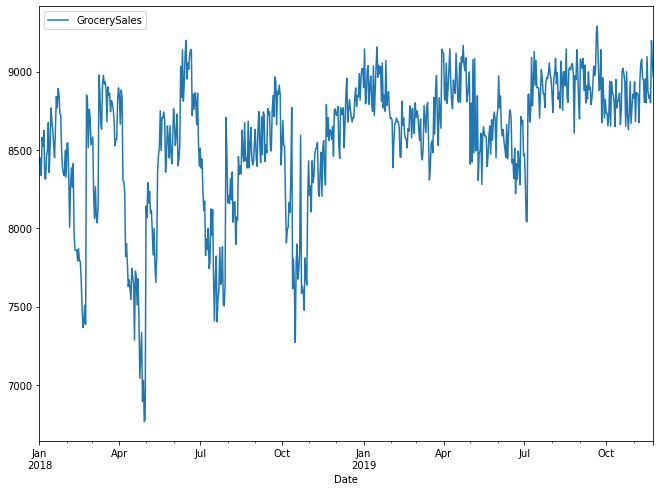

In [96]:
#df = df.set_index('ds')
df.plot(figsize=(11,8))

In [97]:
df_train = df[0:600]
df_test = df[601:]
df_train.size,df_test.size

(600, 91)

In [98]:
df_train.head()

,GrocerySales
Date,
2018-01-01,8418.59
2018-01-02,8447.47
2018-01-03,8336.49
2018-01-04,8579.17
2018-01-05,8524.31


In [164]:
!pip install pyramid

     |████████████████████████████████| 327kB 2.9MB/s 
     |████████████████████████████████| 235kB 8.6MB/s 
     |████████████████████████████████| 122kB 10.6MB/s 


In [167]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [169]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 2.7MB/s 


In [99]:
from pmdarima import auto_arima
model = auto_arima(df_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=8130.152, BIC=8156.524, Time=0.279 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=8200.988, BIC=8209.779, Time=0.036 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=8146.220, BIC=8159.406, Time=0.057 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=8127.666, BIC=8140.851, Time=0.094 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=8199.002, BIC=8203.397, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=8126.146, BIC=8143.727, Time=0.308 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=8127.510, BIC=8149.486, Time=0.426 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=8126.712, BIC=8148.688, Time=0.713 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=8126.541, BIC=8144.122, Time=0.100 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=8130.626, BIC=8148.207, Time=0.099 seconds
Total fit time: 2.147 seconds


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [0]:
forecast = model.predict(n_periods=len(df_test))
forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])

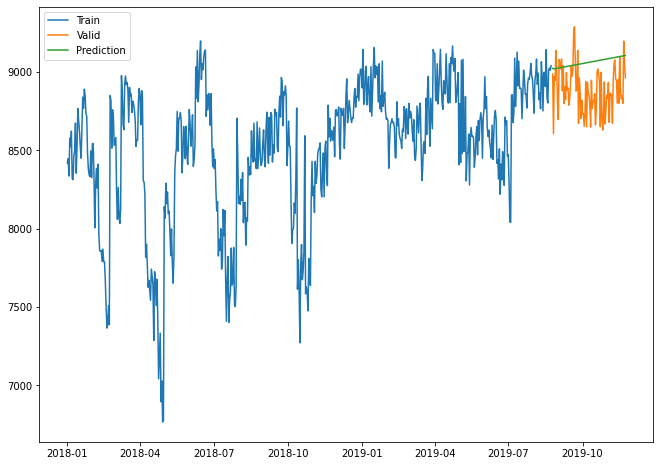

In [101]:
#plot the predictions for validation set
plt.figure(figsize=(11,8))
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Valid')
plt.plot(forecast, label='Prediction')

plt.legend()
plt.show()

In [102]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df_test,forecast))
print(rmse)

232.1813018723135


In [103]:
forecast = forecast.rename(columns={'Prediction'})

,Prediction
Date,
2019-08-25,9024.162408
2019-08-26,9021.200185
2019-08-27,9021.295859
2019-08-28,9022.069350
2019-08-29,9022.993087
...,...
2019-11-19,9102.235938
2019-11-20,9103.202463
2019-11-21,9104.168988


In [104]:
test.shape

(90, 2)

In [0]:
test.drop('Day',axis=1,inplace=True)

In [0]:
test.set_index('Date',inplace=True)

In [0]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['GrocerySales'])

In [109]:
forecast

,GrocerySales
Date,
2019-11-24,9024.162408
2019-11-25,9021.200185
2019-11-26,9021.295859
2019-11-27,9022.069350
2019-11-28,9022.993087
...,...
2020-02-17,9101.269413
2020-02-18,9102.235938
2020-02-19,9103.202463


In [0]:
forecast.to_excel('autoarima.xlsx',index=False)

In [111]:
forecast.shape

(90, 1)